ECE503: Advanced Pattern Recognition
School of Electrical Engineering, KOREA UNIVERSITY
(Homework #2) PCA and LDA

#### 2021020706_Soo_Jeong_Kim

In this homework, your task is to develop a code for PCA to project input digit images into
eigen-digit space and find the matching digit index (0 to 9) given a test input digit image. Please
submit a SINGLE report file which has all your answers and codes in the pdf format.
Please answer the following questions.

1. (PCA Principle) PCA is a technique by which we reduce the dimensionality of data. Please
birefly describe the steps in PCA for face recognition and write down the pseudo-code
(limit to half page length).

2. (Data Visualization) Load and show any sample images in Matlab or Python (MNIST
dataset). The input data you use is divided into several sets. They can be downloaded from
this link http://yann.lecun.com/exdb/mnist/.
    
3. (Hand-writing Digit Recognition)
a) Construct a code that distinguishes 10 classes from 0 to 9 from the given MINIST test
set in problem 2 using PCA.
b) In your code, you should show a set of k coefficients obtained.
c) Please show the classification performance in terms of classification accuracy.

### Brief description of the steps in PCA for face recognition

1. Input: dataset of m images of dimension N*N (training images).
2. Convert these images into vectors of size N^2.
3. Calculate the average of all these face vectors and subtract it from each vector.
4. Take all face vectors so that we get a matrix of size of N^2 * M.
5. Find Covariance matrix by multiplying A with AT. A has dimensions N2 * M, thus AT has dimensions M * N^2. When we multiplied this gives us matrix of N^2 * N^2, which gives us N^2 eigenvectors of N^2 size which is not computationally efficient to calculate. So we calculate our covariance matrix by multiplying A^T and A. This gives us M * M matrix which has M (assuming M << N^2) eigenvectors of size M.
6. Calculate eigen values and eigenvectors of covariance matrix.
7. Calculate Eigenvector and Eigenvalues of the reduced covariance matrix and map them into the C'.
8. Select the K eigenvectors of C' corresponding to the K largest eigenvalues (where K < M). These eigenvectors has size N^2.
9. Take the normalized training faces (face – average face)  x_{i} and represent each face vectors in the linear of combination of the best K eigenvectors.
10. Take the coefficient of eigenfaces and represent the training faces in the form of a vector of those coefficients.
11. Given an unknown face y, first preprocess the face to make it centered in the image and have the same dimensions as the training face.
12. Project the normalized vector into eigenspace to obtain the linear combination of eigenfaces.
13. Take the vector generated in the above step and subtract it from the training image to get the minimum distance between the training vectors and testing vectors.

### Pseudo-code of the steps in PCA for face recognition

load dataset;<br/>
n_samples, h, w = dataset.shape<br/>
n_components = 150  #extract the top 150 eigenfaces

//pca = PCA(n_components) _PCA algorithm<br/>

//compute the d-dimensional mean vector;<br/>
mean_vector = np.array([mean1],[mean2],[mean3])

//compute the scatter matrix;<br/>
for n_samples.shape[1] do<br/>
    scatter_matrix += (all_samples - mean_vector)*(all_samples - mean_vector)^T
    
//compute the covariance matrix<br/>
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])

//compute eigenvectors and corresponding eigenvalues<br/>
for eig_val_from_scatter_matrix do<br/>
    reshape of eig_vec_from_scatter_matrix and eig_vec_from_covariance_matrix
    
//choose k eigenvectors with the largest eigenvalues<br/>
matrix_w = (sorted_eig_val and sorted_eig_vec) tuples<br/>

//transform the samples onto a new subspace<br/>
eigenfaces  = matrix_w.T.dot(all_samples)<br/>
use PCA() class from the matplotlib.mlab


### 2. (Data Visualization) Load and show any sample images in Matlab or Python (MNIST dataset).

In [2]:
import numpy as np
import sys
import os
from array import array

from struct import *
import matplotlib
import matplotlib.pyplot as plt

train_image = open('train-images.idx3-ubyte','rb')
train_label = open('train-labels.idx1-ubyte','rb')
test_image = open('t10k-images.idx3-ubyte','rb')
test_label = open('t10k-labels.idx1-ubyte','rb')

In [3]:
#init variables
img = np.zeros((28,28)) #space for img
lbl = [ [],[],[],[],[],[],[],[],[],[] ] #0~9 num 
d = 0
l = 0
index=0
#first 16 and 8 byte allocated for address _ read it first
s = train_image.read(16)    #read first 16byte
l = train_label.read(8)     #read first  8byte

st= test_image.read(16)    #read first 16byte
sl= test_label.read(8)    #read first  8byte

In [39]:
#read mnist and show number
while True:    
    #1 byte per pixel_ w/ 784(28*28) size
    s = train_image.read(784) #read per 784byte
    l = train_label.read(1) #read per1byte
    if not s:
        break;
    if not l:
        break;
    img = np.reshape(unpack(len(s)*'B',s), (28,28))
    lbl[index].append(img) #img per num(0~9)

#plt.imshow(img,cmap = cm.binary) #img w/ binary shape
#plt.show()

#print(np.shape(lbl)) #label별로 잘 지정됬는지 확인


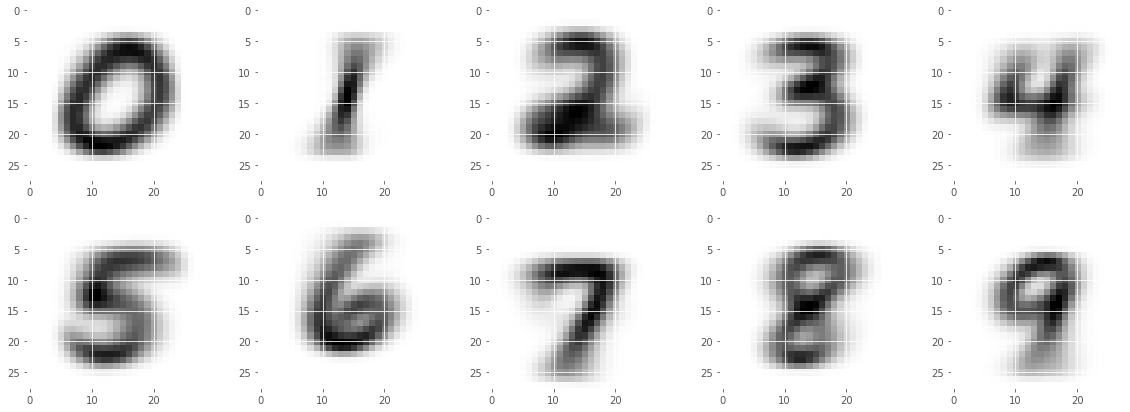

In [81]:
m_img = []

for i in range(2):
    for j in range(5):
        m_img.append(np.mean(lbl[i*5+j],axis=0) )

fig, axs = plt.subplots(2,5,figsize=(20,7))
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(m_img[i*5+j].squeeze(),cmap = cm.binary)
plt.show()

### 3. Hand-writing Digit Recognition)
a) Construct a code that distinguishes 10 classes from 0 to 9 from the given MINIST test set in problem 2 using PCA.<BR/>
b) In your code, you should show a set of k coefficients obtained. <br/>
c) Please show the classification performance in terms of classification accuracy.

In [4]:
img = np.zeros(784)    #1d array (784 byte) - input data
r = np.zeros(10)# 정답이 저장되는 부분
y = []
x = []

t_x = []
t_y = []

print("read training data ")

#training data input to x,y
#트레이닝 데이터 읽기
while True:
    img = train_image.read(784)
    l = train_label.read(1)
    
    if not img:
        break;
    if not l:
        break;

    x.append(unpack(len(img)*'B',img))

    y.append(int(l[0]))    

print("training read done ")

#테스트 데이터 읽기
#test data input -- evaluate neural network
print("read test data ")
while True:
    img = test_image.read(784)
    l   = test_label.read(1)

    if not img:
        break;
    if not l:
        break;

    t_x.append(unpack(len(img)*'B',img))
    t_y.append(int(l[0]))

print("test read done ")

read training data 
training read done 
read test data 
test read done 


In [98]:
x = np.array(x)
X = (x/255.0) #(0~255)_which means white to black_into (0~1.0)
t_x = np.array(t_x)
t_X = (t_x/255.0)

In [151]:
y = np.array(y)
Y = (y/255.0) #(0~255)_which means white to black_into (0~1.0)
t_y = np.array(t_y)
t_Y = (t_y/255.0)

In [103]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X)
pca.fit(t_X)

PCA(n_components=150, whiten=True)

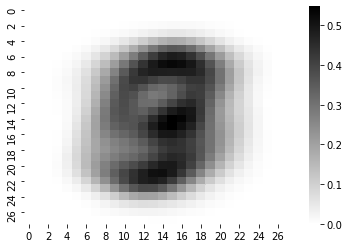

In [150]:
sns.heatmap(pd.DataFrame(X).mean().values.reshape(28, 28), cmap='gray_r')

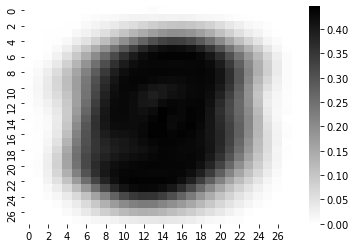

In [40]:
sns.heatmap(pd.DataFrame(X).std().values.reshape(28, 28), cmap='gray_r')

In [128]:
print(pca.components_.shape)

(150, 784)


In [143]:
MB_matrix = np.zeros((pca.components_[:,0].size,10))

for i in range(10):
    MB_array = pca.components_[:,i].flatten()  # covert 2d to 1d array 
    MB_arrayStd = (MB_array - MB_array.mean())/MB_array.std()  
    MB_matrix[:,i] = MB_arrayStd
MB_matrix.shape;

In [144]:
# Covariance
np.set_printoptions(precision=3)
cov = np.cov(MB_matrix.transpose())

# Eigen Values
EigVal,EigVec = np.linalg.eig(cov)

print("Eigenvalues:\n\n", EigVal,"\n")

Eigenvalues:

 [2.5   1.403 0.433 1.109 0.522 0.563 0.72  1.004 0.886 0.926] 



In [145]:
# Ordering Eigen values and vectors
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]

#Projecting data on Eigen vector directions resulting to Principal Components 
PC = np.matmul(MB_matrix,EigVec)   #cross product

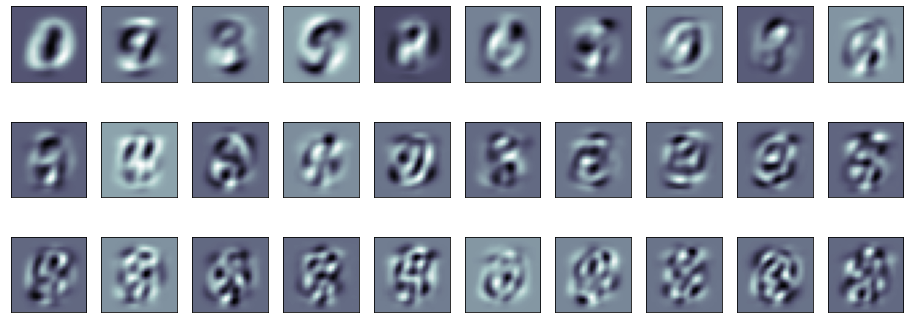

In [127]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(28,28),
              cmap=plt.cm.bone)

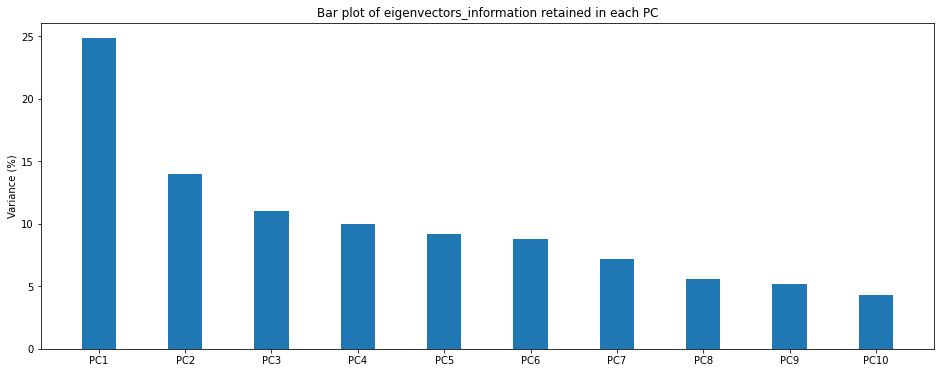

In [147]:
plt.figure(figsize=(16,6))

plt.bar([0,1,2,3,4,5,6,7,8,9],EigVal/sum(EigVal)*100,align='center',width=0.4,
        tick_label = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
plt.ylabel('Variance (%)')
plt.title('Bar plot of eigenvectors_information retained in each PC');

In [184]:
pca_coef = pd.DataFrame(np.dot(X, EigVec[:,:]))
pca_coef

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,3.528730+0.000000j,-1.369660+0.000000j,-1.358548+0.000000j,-4.196910+0.000000j,3.076256+0.000000j,0.742884+0.000000j,-2.852175+0.000000j,0.543673+0.000000j,-0.007666+0.000000j,-1.271641+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
1,7.017938+0.000000j,-1.027293+0.000000j,1.095767+0.000000j,-4.741564+0.000000j,0.180878+0.000000j,0.089245+0.000000j,-1.615000+0.000000j,-0.919319+0.000000j,1.482689+0.000000j,-0.987072+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
2,2.701049+0.000000j,1.511826+0.000000j,-0.333870+0.000000j,-0.029359+0.000000j,2.303495+0.000000j,-0.100195+0.000000j,1.468480+0.000000j,0.842331+0.000000j,1.558735+0.000000j,0.722599+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
3,0.056228+0.000000j,-2.443662+0.000000j,1.224376+0.000000j,-2.008998+0.000000j,4.297173+0.000000j,-2.373816+0.000000j,-0.039363+0.000000j,-1.470271+0.000000j,2.365977+0.000000j,-0.272883+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
4,1.354394+0.000000j,2.764605+0.000000j,-0.563239+0.000000j,-3.185712+0.000000j,4.067639+0.000000j,0.321928+0.000000j,-1.608433+0.000000j,-2.211940+0.000000j,1.909276+0.000000j,-1.070116+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.561858+0.000000j,-1.134771+0.000000j,-0.237159+0.000000j,-3.561938+0.000000j,4.670711+0.000000j,-0.649161+0.000000j,0.221904+0.000000j,-0.981760+0.000000j,-0.714314+0.000000j,-1.732674+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
59996,3.481454+0.000000j,-2.746573+0.000000j,-1.634337+0.000000j,-4.251038+0.000000j,4.178964+0.000000j,-0.922335+0.000000j,0.174518+0.000000j,1.881660+0.000000j,-0.442491+0.000000j,-1.127083+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
59997,2.108581+0.000000j,0.482782+0.000000j,-2.482359+0.000000j,-4.520119+0.000000j,2.150975+0.000000j,1.458871+0.000000j,-0.147794+0.000000j,-1.111556+0.000000j,0.741204+0.000000j,-1.093110+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
59998,3.733246+0.000000j,0.023147+0.000000j,1.895580+0.000000j,-1.845930+0.000000j,1.261606+0.000000j,2.087123+0.000000j,-1.314650+0.000000j,0.180484+0.000000j,1.605109+0.000000j,-0.236542+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j


In [149]:
np.imag(pca_coef).sum() == 0

True

In [166]:
# Covariance
np.set_printoptions(precision=3)
cov = np.cov(t_X.transpose())

# Eigen Values
EigVal,EigVec = np.linalg.eig(cov)

#print("Eigenvalues:\n\n", EigVal,"\n")

In [168]:
test_pca = pd.DataFrame(np.dot(t_X, EigVec[:,:]))

In [182]:
label = [0 for _ in range(test_pca.shape[0])]

In [192]:
for i in range(test_pca.shape[0]):
    dist_seq = np.zeros(10)  
    dist_table = pca_coef.iloc[:, :-1] - test_pca.iloc[i, :]
    dist_table = np.square(dist_table)
    for j in range(10):
        ref_label = np.where(pca_coef.iloc[:, -1] == j)[0]
        dist_seq[j] = dist_table.iloc[ref_label, :].values.mean()
    label[i] = dist_seq.argmin()
    #print("{0} data complete".format(i))
test_pca["label"] = label

<ipython-input-192-b09fdf5ca641>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  dist_seq[j] = dist_table.iloc[ref_label, :].values.mean()
<ipython-input-192-b09fdf5ca641>:7: RuntimeWarning: Mean of empty slice.
  dist_seq[j] = dist_table.iloc[ref_label, :].values.mean()
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in cdouble_scalars
  ret = ret.dtype.type(ret / rcount)


In [190]:
acc = np.sum(label[:1000] == t_Y[:1000]) / 1000

In [191]:
acc

0.085